In [2]:
# Import required libraries for interactive plotting
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from matplotlib.widgets import Button, Slider
from ipywidgets import *

# Import helper functions
from helper_functions import *

# The Infinite Square Well

The first demonstration involves the infinite square well potential, given by
$$
V(x) = \begin{cases} 0 & 0 < x < L, \\
    \infty & \text{otherwise}. \\
    \end{cases}
$$
The time-independent Schrodinger equation in the region $0 < x < L$ is then
$$
-\frac{\hbar^2}{2m}\frac{d^2 \psi}{dx^2} = E \psi,
$$
which yields the following normalised solutions for the position-space wavefunction
$$
\psi_n(x) = 
    \sqrt{\frac{2}{L}}\sin\left( \frac{n \pi}{L}\right), \hspace{0.5cm} n \in \mathbb{Z},
$$
and corresponding eigenenergies
$$
E_n = \frac{n^2 \hbar^2 \pi^2}{2 m L^2}.
$$

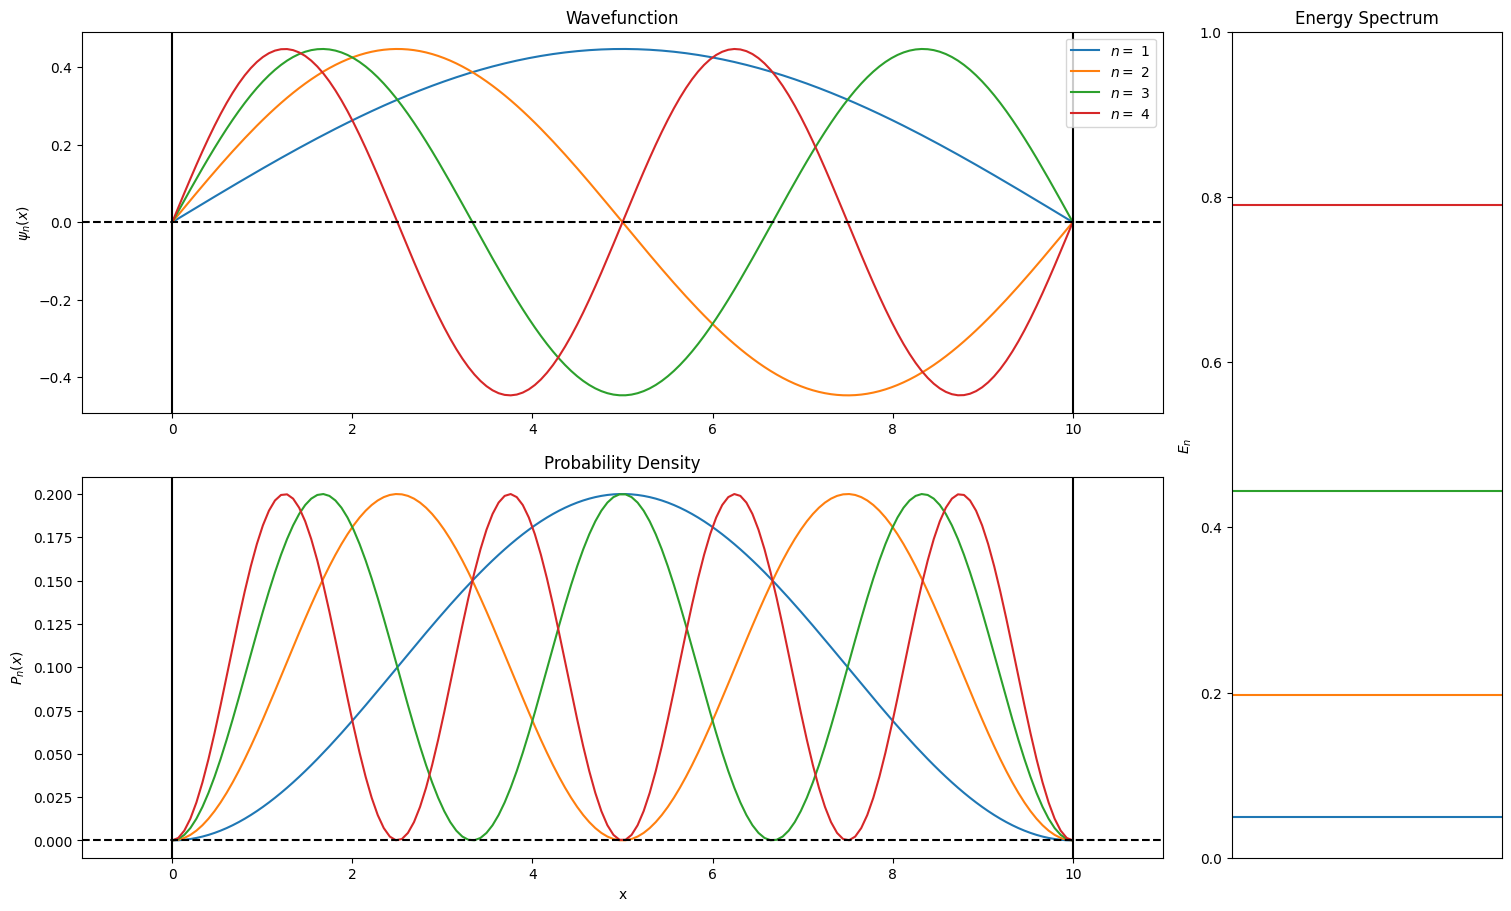

In [3]:
# Set number of eigenstates to view
n_states = 4

x = np.linspace(0, L, 150)

# Visualise the first n_states energy eigenstates and corresponding probability distributions
fig = plt.figure(figsize=(15,9), layout = 'constrained')
spec = fig.add_gridspec(2,2, width_ratios=[4,1])
ax0 = fig.add_subplot(spec[0,0])
ax1 = fig.add_subplot(spec[1,0])
ax2 = fig.add_subplot(spec[:,1])

for n in range(1,n_states+1):  
    wf = ax0.plot(x, infinite_square_well_wavefunction(x, n), label = rf'$n = $ {n}')
    color = wf[0].get_color()
    ax1.plot(x, infinite_square_well_wavefunction(x, n)**2, color = color)
    ax2.axhline(infinite_square_well_energy(n), c = color)

ax0.axhline(0, ls = '--', c = 'k')
ax1.axhline(0, ls = '--', c = 'k')
ax0.axvline(0, c = 'k')
ax0.axvline(L, c = 'k')
ax1.axvline(0, c = 'k')
ax1.axvline(L, c = 'k')

ax0.set_xlim(left = -1, right = L+1)
ax1.set_xlim(left = -1, right = L+1)
ax2.set_xticks([])
ax2.set_ylim(0,1)

ax1.set_xlabel('x')
ax0.set_ylabel(r'$\psi_n(x)$')
ax1.set_ylabel(r'$P_n(x)$')
ax2.set_ylabel(r'$E_n$')
ax0.set_title('Wavefunction')
ax1.set_title('Probability Density')
ax2.set_title('Energy Spectrum')
ax0.legend()
plt.show()

Finding the energy eigenstates amounts to satisfying the conditions:
$$
\psi_n(x = 0) = 0, \hspace{0.5cm}
\psi_n(x = L) = 0.
$$
The $\sin$ function automatically takes care of the $\psi_n(x=0)=0$ requirement, so we only need to find energies which enforce $\psi_n(x=L)=0$. We can demonstrate this by scrolling through the possible energy values and finding the points at which $\psi(x=L) = 0$. When you are in the vicinity of an energy eigenstate, the line colour will change to green.

In [ ]:
%matplotlib inline

# Create interactive slider
interactive_plot = interactive(interactive_energy_eigstate_plot, E=FloatSlider(
    value=1.0,
    min=0,
    max=2.0,
    step=0.001,
    description='Energy:',
    disabled=False,
    continuous_update=True,
    orientation='vertical',
    readout=True,
    readout_format='.3f',
))
box_layout = Layout(display='flex', flex_flow='row', align_items='center')

# Place slider at right of figure
display(HBox([interactive_plot.children[1],interactive_plot.children[0]], layout=box_layout))
output = interactive_plot.children[-1]
output.layout.height = '350px'

For time-independent potentials, the time-dependence of each energy eigenstate is given by
$$
\phi_n(t) = e^{-i E_n t/\hbar}.
$$
So each energy eigenstate has the time-dependent wavefunction
$$
\psi_n(x,t) = \psi_n(x)\phi_n(t).
$$
Using the de-Broglie relation between energy and angular frequency, $E_n=\hbar\omega_n$, this defines a rotation of the spatial wavefunction, causing it to rotate around the real axis.

In [5]:
# Specify a principal quantum number
n = 4

t = np.linspace(0, T, 100)

psi_n = infinite_square_well_wavefunction(x, n)
E_n = infinite_square_well_energy(n)
phi_n = simple_time_dependence(t, E_n)

psi_total = np.einsum('i,j->ij',psi_n, phi_n)



With the spectrum of eigenstates, we can now construct any wavefunction as this set forms a basis.
$$
\Psi(x) = \sum_{n=1}^\infty c_n \psi_n(x).
$$
As the $\psi_n(x)$ are individually normalised, the total normalisation condition on $\Psi(x)$ amounts to
$$
\sum_{n=1}^\infty |c_n|^2 = 1.
$$

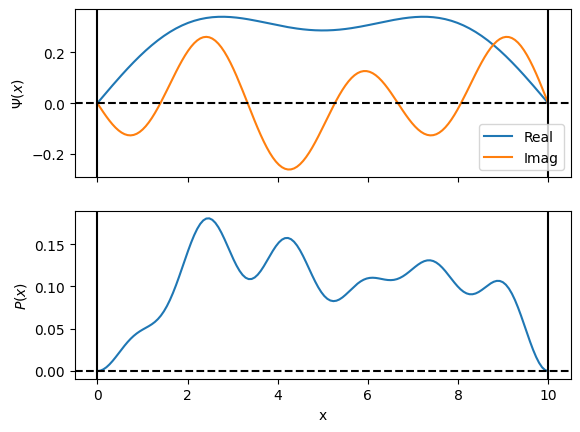

In [6]:
# Choose the energy eigenstates and corresponding linear coefficients
n_set = [1, 3, 6]
c_n = [4, 1 + 1j, -2j]

# Normalisation condition 
cn_square = np.vdot(c_n, c_n)
c_n = c_n / np.sqrt(cn_square)

# Sum over the states
psi_lc = np.zeros(len(x), dtype = 'complex')

for istate, state in enumerate(n_set):
    psi_lc += c_n[istate] * infinite_square_well_wavefunction(x, state)

# Plot resulting wavefunction and probability density
fig, axs = plt.subplots(nrows = 2, ncols = 1, sharex = True)
axs[0].plot(x, np.real(psi_lc), label = 'Real')
axs[0].plot(x, np.imag(psi_lc), label = 'Imag')
axs[0].axhline(0, ls = '--', c = 'k')
axs[0].axvline(0, c = 'k')
axs[0].axvline(L, c = 'k')
axs[0].set_ylabel(r'$\Psi(x)$')
axs[0].legend()

axs[1].plot(x, np.real(np.conjugate(psi_lc) * psi_lc))
axs[1].axhline(0, ls = '--', c = 'k')
axs[1].axvline(0, c = 'k')
axs[1].axvline(L, c = 'k')
axs[1].set_xlabel('x')
axs[1].set_ylabel(r'$P(x)$')
plt.show()